In [1]:
import numpy as np
import json 
import argparse
import ast
import sys 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from IPython import display
from IPython.display import clear_output
import os
sys.path.append(os.getcwd())
%matplotlib inline
%reload_ext autoreload
%autoreload 2


import IPython
ADJUST = lambda x, y: (x[0]-y, x[1]-y)

class Renderer():
    def __init__(self, filename, t):
        with open(filename) as f:
            self.game_data = json.load(f)
        self.size = self.game_data['size']
        self.pad_width = self.game_data['pad_width']
        self.units = self.game_data['units']
        self.record = self.game_data['ep_record']
        self.t = t
        #self.info = info

    def replay(self):
        if self.t:
            for _step in self.record.keys():
                pred_pos = self.record[_step]["pred_pos"]
                pred_pos = ast.literal_eval(pred_pos)
                prey_pos = self.record[_step]["prey_pos"]
                prey_pos = ast.literal_eval(prey_pos)
                #print(f"ACTIONS: {self.record[_step]['actions']}")
                #print(f"REWARDS: {self.record[_step]['rewards']}")
                #print(f"STEPS: {_step}")
                if _step == '0':
                    self.render_terminal(pred_pos, prey_pos)
                    #key = input("Press Enter to START")
                    self.clear_lines((self.size+12))
                else:
                    self.render_terminal(pred_pos, prey_pos)
                    #key = input("press Enter to continue or \"e\" to exit")
                    self.clear_lines((self.size+12))
                #if key == "e":
                 #   sys.exit()
                
                if _step == "20":
                    break

    def render_terminal(self, predator_pos, prey_pos):
         adjust = lambda x, y: (x[0]-y, x[1]-y)
         gmap = np.zeros((self.size, self.size), dtype=np.int32).tolist()
         for _id, position in predator_pos.items():
             (x, y) = adjust(position, self.pad_width)
             print(f"{_id}: {(x, y)}")
             gmap[x][y]  = f"T{_id[-1]}"
         for _id, position in prey_pos.items():
             if position == (0,0):
                 continue
             (x, y) = adjust(position, self.pad_width)
             print(f"{_id}: {(x, y)}")
             gmap[x][y]  = f"D{_id[-1]}"

         gmap = [list(map(lambda x: "." if x == 0 else x, l)) for l in gmap]
         print(np.matrix(gmap))

    def clear_lines(self, lines=15):
        LINE_UP = '\033[1A'
        LINE_CLEAR = '\x1b[2k'
        IPython.display.clear_output(wait=True)
        for i in range(lines):
            print(LINE_CLEAR, end=LINE_UP)
        
    def render_plot(self):
        return self.record
        for _step in self.record.keys():
                pred_pos = self.record[_step]["pred_pos"]
                pred_pos = ast.literal_eval(pred_pos)
                prey_pos = self.record[_step]["prey_pos"]
                prey_pos = ast.literal_eval(prey_pos)
                print(f"ACTIONS: {self.record[_step]['actions']}")
                print(f"REWARDS: {self.record[_step]['rewards']}")
                print(f"STEPS: {_step}")
        pass



In [36]:
filename = f"../inference/4/20-nf-d2-0-87.0"
renderer = Renderer(filename, 0.1)
#renderer.replay()
replay_dict = renderer.record
steps = len(renderer.record)
print(steps)

145


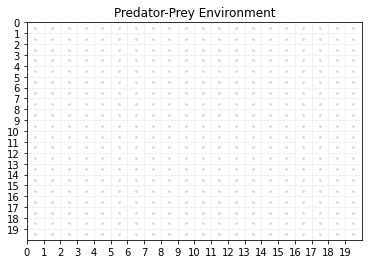

In [17]:
import matplotlib
from collections import deque
# Plotting function 1 Complete.
# Create a Figure and axis.
fig , ax = plt.subplots()
# Set limtis of the axis
size = renderer.size
pad_width = renderer.pad_width
# Set the Axis and all the labesl on the axis.
ax.set_xlim(0, size)
ax.set_ylim(size,0)
ax.set_xticks(range(0,size))
ax.set_yticks(range(0,size))
# Create a grid on the minor girds.
ax.grid(alpha=0.2)
ax.set_title("Predator-Prey Environment")
X , Y = np.meshgrid(range(0, size), range(0, size))
ax.scatter(X+0.5, Y+0.5, color="black", alpha=0.1, s=4)
sc_pred = ax.scatter([], [], label="Predator", color='red', edgecolors='k', marker="o")
sc_prey= ax.scatter([], [], label="Prey", color="green", edgecolors='k', marker = "X")
num_agents = renderer.units
l_points = []
lines = []
rects = []
d_points = []
for i in range(num_agents):
    lobj , = ax.plot([], [], lw=1)
    lines.append(lobj)
    l_points.append([0,0])
    d = deque(maxlen=3)
    d_points.append(d)
    # Creating Rectangles 
    rect = matplotlib.patches.Rectangle((1,1), width=5, height=5)
    
def get_last_points(i):
    if i == 0:
        _step = '0'
    else:
        _step = str(i-1)
    last_points = []
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    j=0
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
        d_points[j].append((ycoord, xcoord))
        j += 1

    for k, v in prey_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
        d_points[j].append((ycoord, xcoord))
        j += 1
    return last_points

RectStart (1, 1)


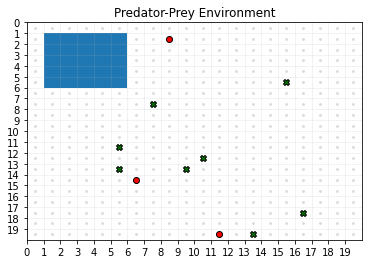

In [3]:
# NO EXTRA LINES!
import matplotlib
from collections import deque
# Plotting function 1 Complete.
# Create a Figure and axis.
fig , ax = plt.subplots()
# Set limtis of the axis
size = renderer.size
pad_width = renderer.pad_width
# Set the Axis and all the labesl on the axis.
ax.set_xlim(0, size)
ax.set_ylim(size,0)
ax.set_xticks(range(0,size))
ax.set_yticks(range(0,size))
# Create a grid on the minor girds.
ax.grid(alpha=0.2)
ax.set_title("Predator-Prey Environment")
X , Y = np.meshgrid(range(0, size), range(0, size))
ax.scatter(X+0.5, Y+0.5, color="black", alpha=0.1, s=4)
sc_pred = ax.scatter([], [], label="Predator", color='red', edgecolors='k', marker="o")
sc_prey= ax.scatter([], [], label="Prey", color="green", edgecolors='k', marker = "X")
num_agents = renderer.units
l_points = []
lines = []
rects = []
d_points = []
for i in range(num_agents):
    lobj , = ax.plot([], [], lw=1)
    lines.append(lobj)
    l_points.append([0,0])
    d = deque(maxlen=3)
    d_points.append(d)
    # Creating Rectangles 
    rect = matplotlib.patches.Rectangle((1,1), width=5, height=5)
    
def get_last_points(i):
    if i == 0:
        _step = '0'
    else:
        _step = str(i-1)
    last_points = []
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    j=0
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
        d_points[j].append((ycoord, xcoord))
        j += 1

    for k, v in prey_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
        d_points[j].append((ycoord, xcoord))
        j += 1
    return last_points

# Creating Rectangles 
print(f"RectStart {rect.get_xy()}")

def animate(i):
    _step = str(i)
    last_points = get_last_points(i)
    i = 0
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    pos_x = []
    pos_y = []
    pred_point = []
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_x = last_points[i][1]
        last_y = last_points[i][0]
        pos_x.append(xcoord)
        pos_y.append(ycoord)
        lines[i].set_data([last_x, xcoord], [last_y, ycoord])
        lines[i].set_color("red")
        rect_x = rect.get_x()
        rect_x += 1
        
        #rect.set_x(rect_x)
        ax.add_patch(rect)
        i+=1

    pos_x = np.array(pos_x)
    pos_y = np.array(pos_y)
    data = np.column_stack((pos_x, pos_y))
    sc_pred.set_offsets(data)

    pos_x = []
    pos_y = []
    for k, v in prey_pos.items():

        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_x = last_points[i][1]
        last_y = last_points[i][0]
        pos_x.append(xcoord)
        pos_y.append(ycoord)
        #print(f"{(last_x, last_y)} -> {(xcoord, ycoord)}")
        lines[i].set_data([last_x, xcoord], [last_y, ycoord])
        lines[i].set_color("green")
        i+=1
    pos_x = np.array(pos_x)
    pos_y = np.array(pos_y)
    data = np.column_stack((pos_x, pos_y))
    sc_prey.set_offsets(data)
    ax.plot()
    plt.show()

steps = len(renderer.record)
anim = FuncAnimation(fig , animate, frames=3    , interval=500)
anim.save('./infer51.gif', writer='imagemagick', dpi=300)

143


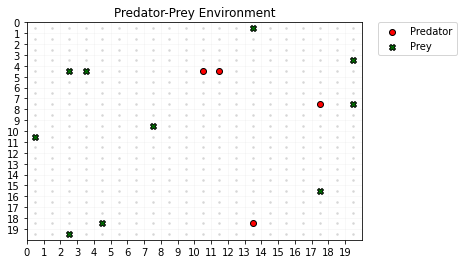

In [37]:
import matplotlib
from collections import deque
# Plotting function 1 Complete.
# Create a Figure and axis.
fig , ax = plt.subplots()
# Set limtis of the axis
size = renderer.size
pad_width = renderer.pad_width
# Set the Axis and all the labesl on the axis.
ax.set_xlim(0, size)
ax.set_ylim(size,0)
ax.set_xticks(range(0,size))
ax.set_yticks(range(0,size))
# Create a grid on the minor girds.
ax.grid(alpha=0.1)
ax.set_title("Predator-Prey Environment")
X , Y = np.meshgrid(range(0, size), range(0, size))
ax.scatter(X+0.5, Y+0.5, color="black", alpha=0.1, s=3)
sc_pred = ax.scatter([], [], label="Predator", color='red', edgecolors='k', marker="o")
sc_prey= ax.scatter([], [], label="Prey", color="green", edgecolors='k', marker = "X")
ax.legend(bbox_to_anchor=(1.05, 1),
        loc='upper left', borderaxespad=0.)



num_agents = renderer.units
l_points = []
lines = []
d_points = []
rec_pred = matplotlib.patches.Rectangle((1,1), width=4, height=4, \
    fill=False, edgecolor="black", facecolor="red")
rec_prey = matplotlib.patches.Rectangle((1,1), width=6, height=6, fill=False)
for i in range(num_agents):
    lobj , = ax.plot([], [], lw=1)
    lines.append(lobj)
    l_points.append([0,0])
    d = deque(maxlen=4)
    d_points.append(d)
    
def get_last_points(i):
    if i == 0:
        _step = '0'
    else:
        _step = str(i-1)
    last_points = []
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    j=0
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
        d_points[j].append((ycoord, xcoord))
        j += 1

    for k, v in prey_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_points.append((ycoord, xcoord))
        d_points[j].append((ycoord, xcoord))
        j += 1
    return last_points

# Creating Rectangles 
#print(f"RectStart {rect.get_xy()}")

def animate(i):
    _step = str(i)
    last_points = get_last_points(i)
    i = 0
    pred_pos = renderer.record[_step]["pred_pos"]
    pred_pos = ast.literal_eval(pred_pos)
    prey_pos = renderer.record[_step]["prey_pos"]
    prey_pos = ast.literal_eval(prey_pos)
    pos_x = []
    pos_y = []
    pred_point = []
    for k, v in pred_pos.items():
        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_x = last_points[i][1]
        last_y = last_points[i][0]
        pos_x.append(xcoord)
        pos_y.append(ycoord)
        
        if k.startswith("predator_0"):
            rect_x = rec_pred.get_x()
            rect_x = xcoord -2
            rect_y = rec_pred.get_y()
            rect_y = ycoord - 2
            rec_pred.set_xy((rect_x, rect_y))
            rec_pred.set_alpha(0.1)
            ax.add_patch(rec_pred)
        d = d_points[i]
        line_xdat = []
        line_ydat = []
        for zk in list(d):
            line_xdat.append(zk[1])
            line_ydat.append(zk[0])
        line_xdat.append(xcoord)
        line_ydat.append(ycoord)
        lines[i].set_data(line_xdat, line_ydat)
        lines[i].set_color("red")
        #rect.set_x(rect_x)
        i+=1

    pos_x = np.array(pos_x)
    pos_y = np.array(pos_y)
    data = np.column_stack((pos_x, pos_y))
    sc_pred.set_offsets(data)

    pos_x = []
    pos_y = []
    for k, v in prey_pos.items():

        v = ADJUST(v, pad_width)
        xcoord = v[1]+0.5
        ycoord = v[0]+0.5
        last_x = last_points[i][1]
        last_y = last_points[i][0]
        pos_x.append(xcoord)
        pos_y.append(ycoord)
        #print(f"{(last_x, last_y)} -> {(xcoord, ycoord)}")
        lines[i].set_data([last_x, xcoord], [last_y, ycoord])
        lines[i].set_color("green")
        i+=1

        if k.startswith("prey_0"):
            rect_x = rec_prey.get_x()
            rect_x = xcoord -3
            rect_y = rec_prey.get_y()
            rect_y = ycoord - 3
            rec_prey.set_xy((rect_x, rect_y))
            rec_prey.set_alpha(0.1)
            ax.add_patch(rec_prey)

    pos_x = np.array(pos_x)
    pos_y = np.array(pos_y)
    data = np.column_stack((pos_x, pos_y))
    sc_prey.set_offsets(data)
    ax.plot()
    plt.show()
#for i in range(5):
 #   animate(i)
steps = len(renderer.record)-2
print(steps)
anim = FuncAnimation(fig , animate, frames=steps, interval=250)
anim.save('./plot_mult5-2.gif', writer='pillow', dpi=300)

In [ ]:
# A sample Intoruction to the game. | Make no trials 
plot_1 = 'inference/1/15-ia-d1-1v5-1-98.0'

# Sample Problem: But advantage to prey now. | Make no trails.
plot_1_1 = 'inference/1/15-if-d2-1v5-2-289.0'

# Good mulit agent problem solving.
plot_2 = 'inference/1/15-ia-d1-3v6-4-118.0'

# Need to better cooperation. 
plt_3 = 'inference/2/20-ia-d2-2-174.0'

# Shared and slacking agents 
plt_4 = 'inference/3/20-sa-d2-4-309.0'

# Finally A PACK of AGENTS!
plt_5 = 'inference/4/20-nf-d2-0-87.0'